# (B) Bound case

In [66]:
# This cell runs the file "Orbital_functions.ipynb" such that the functions in that file can be utillized here
%run ./Orbital_functions.ipynb

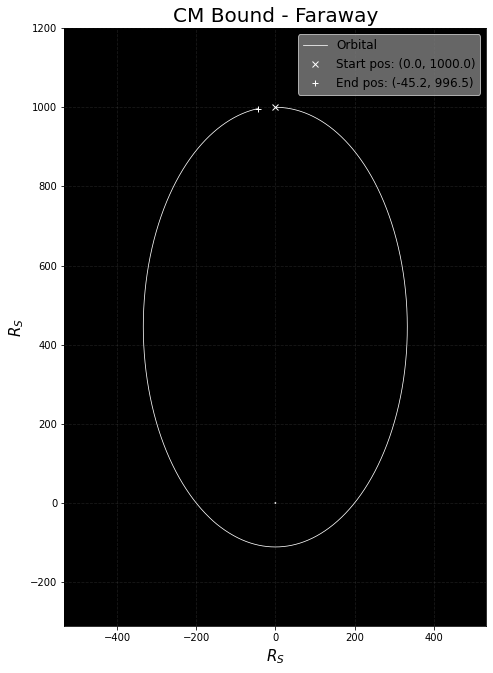

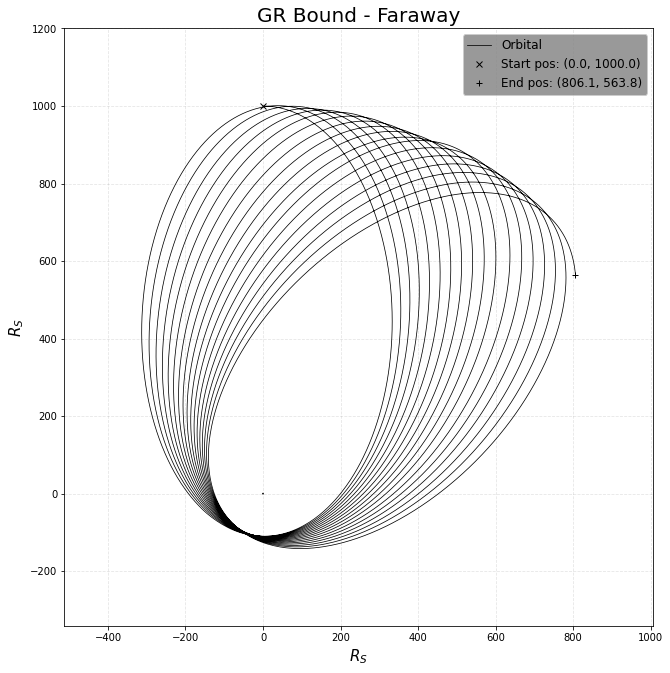

In [67]:

# # CM Bound orbital, close starting pos
# s2 = [0,10,0.2,0]
# pos2 = orbitals(s2, GR = False,Tmax = 2000)[1]
# orbPlot2 = orbPlotter(pos2,'CM Bound - Close')

# CM Bound orbital, faraway starting pos
s1 = [0,1000,0.01,0]
pos1 = orbitals(s1, GR = False,Tmax = 112000)[1]
orbPlot1 = orbPlotter(pos1,'CM Bound - Faraway', save = True)

# # GR bound orbital, close starting pos
# s2 = [0,10,0.2,0]
# pos2 = orbitals(s2, GR = True,Tmax = 2000)[1]
# orbPlot2 = orbPlotter(pos2,'GR Bound - Close', GR = True)

# GR bound orbital, faraway starting pos
s2 = [0,1000,0.01,0]
pos2 = orbitals(s2, GR = True, Tmax = 2027500)[1]
orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway', GR = True)
# prettyOrbPlot2 = prettyOrbPlotter(pos2,'GR Bound - Faraway (pretty)', GR = True)

# # GR bound orbital, faraway starting pos, one round
# s2 = [0,1000,0.01,0]
# pos2 = orbitals(s2, GR = True, Tmax = 112000)[1]
# orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway', GR = True, save = True)
# # prettyOrbPlot2 = prettyOrbPlotter(pos2,'GR Bound - Faraway (pretty)', GR = True)

## Checking whether GR reduces to CM
We check by checking whether the parameters of the ellipse of the first round trip in the GR case mathces the ellipse of the CM case.

It should be said that throughout this we assume some things in this:
1. The motion of the first round trip is an ellipse in both cases.
2. That the line going thorugh the points $(x_1, max(y))$ and $(x_2, min(y))$ is perfectly horizontal (that is $x_1 = x_2$).
3. That the line going thorugh the points $(max(x), y_1)$ and $(min(x), y_2)$ is perfectly vertical (that is $y_1 = y_2$).

We check the semi-major and -minor axis $a$ and $b$ by finding the distances between the points mentioned above

$$a = \frac{|| (x_1, \max(y)) - (x_2, \min(y)) ||}{2},$$

and similarly for the semi-minor axis $b$

$$b = \frac{|| (\max(x), y_1) - (\min(x), y_2) ||}{2}.$$

δa = 1.2748124920552755, δb = 10.435199512380166


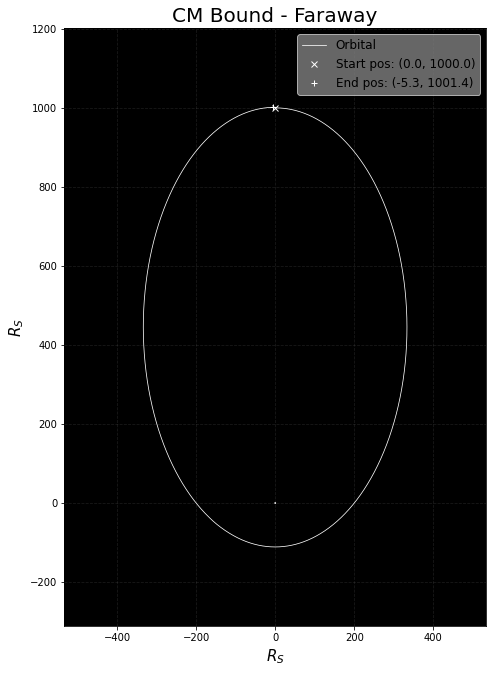

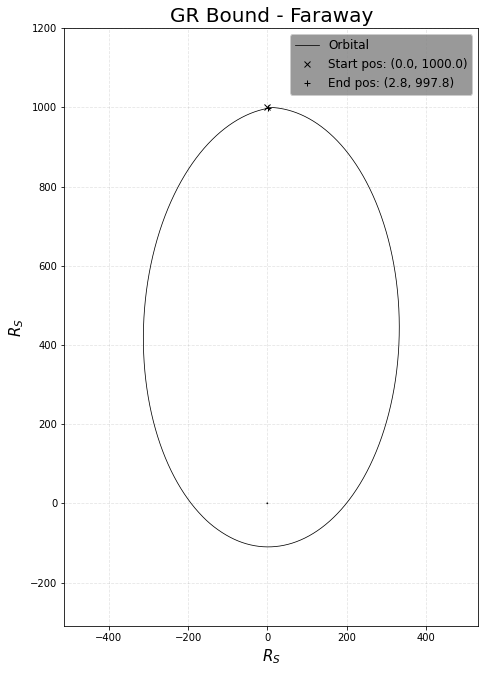

In [68]:
# CM Bound orbital, faraway starting pos
s1 = [0,1000,0.01,0]
pos1 = orbitals(s1, GR = False,Tmax = 116000)[1]
orbPlot1 = orbPlotter(pos1,'CM Bound - Faraway', show = True)

# GR bound orbital, faraway starting pos, one round
s2 = [0,1000,0.01,0]
pos2 = orbitals(s2, GR = True, Tmax = 112000)[1]
orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway', GR = True, show = True)

a_CM = np.abs(max(pos1[1]) - min(pos1[1]))/2
b_CM = np.abs(max(pos1[0]) - min(pos1[0]))/2

a_GR = np.abs(max(pos2[1]) - min(pos2[1]))/2
b_GR = np.abs(max(pos2[0]) - min(pos2[0]))/2

δa = np.abs(a_CM - a_GR)
δb = np.abs(b_CM - b_GR)


a_CM, b_CM, a_GR, b_GR
print(f'δa = {δa}, δb = {δb}')

The result of $\delta a \approx 1.3$ is pretty nice.
The result of $\delta b \approx 10.4$ is not as good, but could be caused by the precession of the orbit in GR. Further validation of this can be done when we've checked whether the precession fits with the analytical predictions.

## Checking the precession
First we find the analytical value for the precession angle. The precession in our units is given by
    $$\Delta \phi = \frac{6 \pi G M}{\left( 1 - e^2 \right) a c^2} \quad \longrightarrow \quad \frac{6 \pi}{\left(1 - e^2 \right) \alpha}$$
where $e = \sqrt{1 - \beta^2/\alpha^2}$ is the eccentricity of the motion. This formula is calculated from the method of Post-Newtonian corrections, and thus the $\alpha$ here is actually the $\alpha$ from the Classical case. Let's take the case from before

In [69]:
# Taking the parameters of the motion from the CM case above
α = a_CM
β = b_CM
e = np.sqrt(1 - β**2/α**2)

# Calculating the analytically predicted value of the precession angle (in radians), and how many times it divides 2π radians.
Δφr = 6*np.pi/((1 - e**2)*α)
angDiv = 2*np.pi/Δφr

Δφa = Δφr*360/(2*np.pi) #Convert to angles
print(f'Δφ (in radians) = {Δφr:.3f}, Δφ (in angles) = {Δφa:.3f}, Circle divisions = {angDiv:.0f}')

Δφ (in radians) = 0.094, Δφ (in angles) = 5.399, Circle divisions = 67


Now, to check whether this fits with our numerical model first we generate the GR scenario from the same boundary conditions and let it run for a full 360. Then we compile the distance to the origin at every point along the motion into an array. Then we use a function to find all the local extrema in the distances array. The total number of peaks is then the total number of orbitals in a full 360. We then compare this result to the number of circle divisions from the analytical solution.

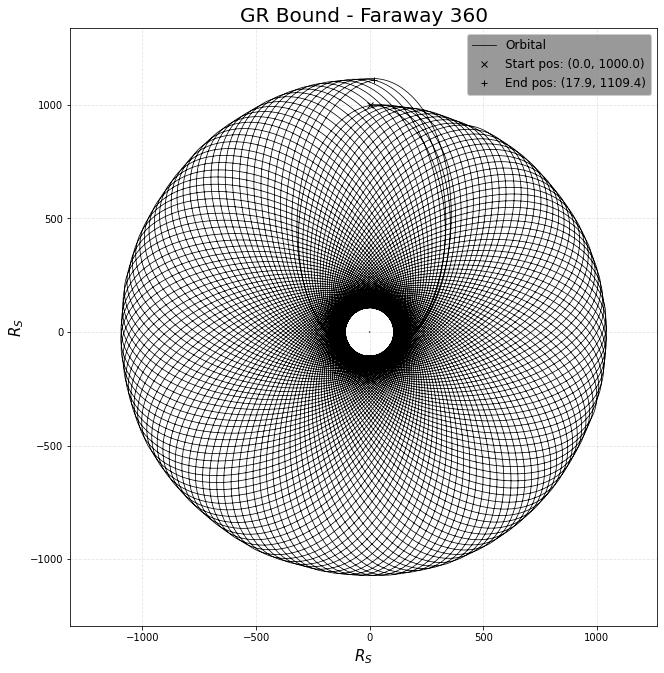

In [70]:
# GR bound orbital, faraway starting pos, full 360
s2 = [0,1000,0.01,0]
pos2 = orbitals(s2, GR = True, Tmax = 116700*145)[1]
orbPlot2 = orbPlotter(pos2,'GR Bound - Faraway 360', GR = True)
# prettyOrbPlot2 = prettyOrbPlotter(pos2,'GR Bound - Faraway 360 (pretty)', GR = True)

In [97]:
from scipy.signal import argrelextrema

# Compiling the distances at every point of the motion in an array 
Ls = []
for i in range(len(pos2[0])):
    L = np.sqrt(pos2[0][i]**2 + pos2[1][i]**2)
    Ls.append(L)
Ls = np.array(Ls)

# Finding the number of peaks in the distances array
peaks = argrelextrema(Ls, np.greater)
peaks = peaks[0]

# Adding one because the last peak is not counted
N = len(peaks) + 1

print(f'The number of peaks in a full 360 is then {N}.')


The number of peaks in a full 360 is then 133.


This actually fits perfectly with the analytically calculated 133 circle divisions.

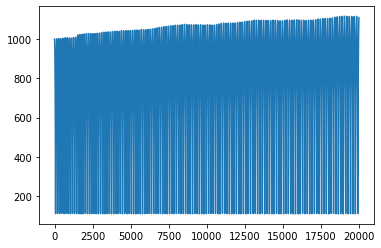

In [72]:
t = range(len(Ls))
plt.plot(t,Ls)

To check whether the discrepancy in the semi-minor axis $\delta b \approx 10.4$ is due to the precession of the orbit we try and find the 

In [73]:
r = 1000
ΔO = r * np.sin(Δφr)
ΔO/4


23.5213672902405

## Circular bound orbit
Here's an example of a circular bound orbit

E = 0.00025, ρ = 1000.0, P = 0.02236


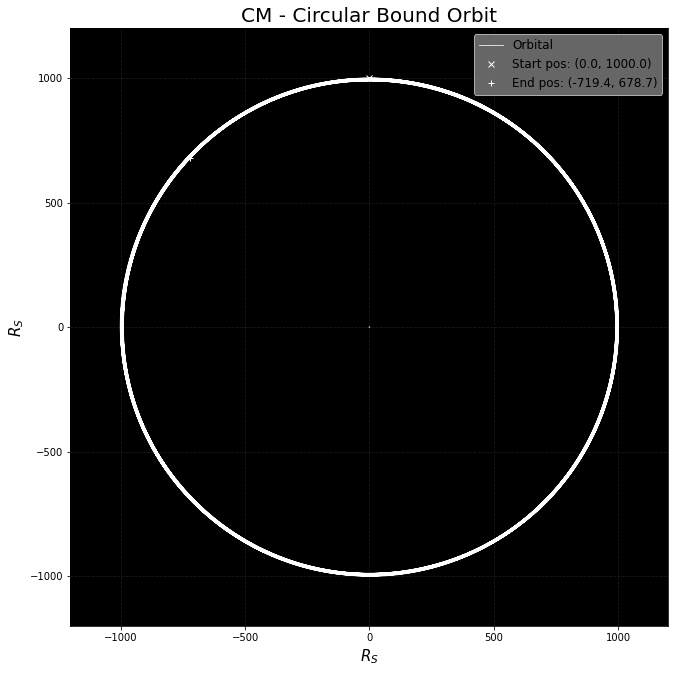

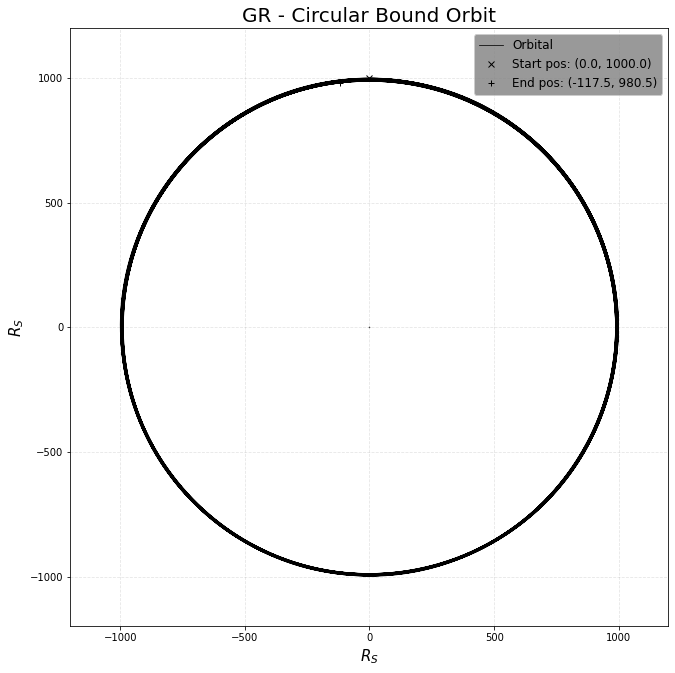

In [80]:
α = 0
β = 1000
κ = 1
ρ = sqrt(α**2 + β**2)

E = 25e-5

P = findPinf(E, α, β, κ)

tmax = 1000000

s = [α, β, P, 0]
pos = orbitals(s, GR = False, Tmax = tmax, resolution = round(tmax), RS = 1, d=3)[1]
orbPlot = orbPlotter(pos,f'CM - Circular Bound Orbit', show = True, GR = False)

s = [α, β, P, 0]
pos = orbitals(s, GR = True, Tmax = tmax, resolution = round(tmax), RS = 1, d=3)[1]
orbPlot = orbPlotter(pos,f'GR - Circular Bound Orbit', show = True, GR = True)

print(f'E = {E}, ρ = {ρ}, P = {P:.5f}')